In [54]:
# This code block imports all the libraries we need, saves all the functions, and
# reads data from CSV and prepares it for analysis

# IMPORT NECESSARY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize


## FUNCTIONS WE HAVE WRITTEN
# Simulate the SIR model if we know alpha, beta, S0, I0, R0
def sirBasic(S0, I0, R0, alpha, beta, n):
    # Make an empty 3 by 101 matrix that will be the predicted number of people in each group
    SIR = np.zeros((3,n+1))

    # fill in the initial data
    SIR[:,0] = np.array([S0, I0, R0])

    for i in range(n):
        SIR[:,i+1] = SIR[:,i] + np.array([-beta*SIR[0,i]*SIR[1,i], beta*SIR[0,i]*SIR[1,i] - alpha*SIR[1,i], alpha*SIR[1,i]])

    return SIR

# Advanced SIR Model
# alpha1 transitions to alpha2 according to a sigmoid curve
# (center of transition at time n1 and k1 controls how fast it transitions)
# beta1 transitions to beta2 according to a sigmoid curve
# (center of transition at time m1 and j1 controls how fast it transitions)

# Sigmoid function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Advanced SIR simulation
def sirAdvanced(S0, I0, R0, alpha1, alpha2, beta1, beta2, n1, m1, k, j, n):
    # Make an empty 3 by 101 matrix that will be the predicted number of people in each group
    SIR = np.zeros((3,n+1))

    # fill in the initial data
    SIR[:,0] = np.array([S0, I0, R0])

    for i in range(n):
        # update alpha
        alpha = (alpha2 - alpha1)*sigmoid(k*(i - n1)) + alpha1

        # update beta
        beta = (beta2 - beta1)*sigmoid(j*(i - m1)) + beta1

        SIR[:,i+1] = SIR[:,i] + np.array([-beta*SIR[0,i]*SIR[1,i], beta*SIR[0,i]*SIR[1,i] - alpha*SIR[1,i], alpha*SIR[1,i]])

    return SIR

# Function that computes the error between simulated data and real data
def findError(data, simulated):
    return math.sqrt(np.sum((data - simulated)**2))

# Gradient descent method that minimizes a function of one variable
def gradientDescent1D(f, x0, h, tolerance, maxIterations):
    x = x0
    step = h

    for counter in range(maxIterations+1):
        slope = (f(x+step) - f(x))/step
        step = -slope*h
        x = x + step

        if x < 0:
            x = -1*x

        if math.fabs(slope) < tolerance:
            #print('1D gradient descent took', counter, 'iterations to converge')
            #print('The slope at', x, 'is approximately', slope)
            return x
            break

        if counter == maxIterations:
            #print('1D gradient descent failed')
            #print('The slope at', x, 'is approximately', slope)
            return x

## DATA PREPARATION AND READING FROM CSV
# Read real data from a CSV file and run the basic SIR model (skip row 1, ignore column 0)

#data = np.genfromtxt('COVID19DataSK.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))
#data = np.genfromtxt('COVID19DataUSlimited.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))
data = np.genfromtxt('Covid19DataUSLimitedEditedRecovery.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))

# Record dates
dates = np.genfromtxt('Covid19DataUSLimitedEditedRecovery.csv', delimiter=',', skip_header = 1, dtype='unicode', usecols=(0))
dates = dates.tolist()
print(dates)

# Turn the columns into rows
data = np.transpose(data)

# Find the number of days in the real data
lastDay = int(data[0,-1])

# Delete the "day" row in the real data so it will have S, I, and R rows like our SIR models
data = data[1:4,:]

# Pull initial data values from the real data
S0 = data[0,0]
I0 = data[1,0]
R0 = data[2,0]

['10-Mar', '11-Mar', '12-Mar', '13-Mar', '14-Mar', '15-Mar', '16-Mar', '17-Mar', '18-Mar', '19-Mar', '20-Mar', '21-Mar', '22-Mar', '23-Mar', '24-Mar', '25-Mar', '26-Mar', '27-Mar', '28-Mar', '29-Mar', '30-Mar', '31-Mar', '1-Apr', '2-Apr', '3-Apr', '4-Apr', '5-Apr', '6-Apr', '7-Apr', '8-Apr', '9-Apr', '10-Apr', '11-Apr', '12-Apr', '13-Apr', '14-Apr', '15-Apr', '16-Apr', '17-Apr', '18-Apr', '19-Apr', '20-Apr', '21-Apr', '22-Apr', '23-Apr', '24-Apr', '25-Apr', '26-Apr', '27-Apr', '28-Apr', '29-Apr', '30-Apr', '1-May', '2-May', '3-May', '4-May', '5-May', '6-May', '7-May', '8-May', '9-May', '10-May', '11-May', '12-May', '13-May', '14-May', '15-May', '16-May', '17-May', '18-May', '19-May', '20-May', '21-May', '22-May', '23-May', '24-May', '25-May', '26-May', '27-May', '28-May', '29-May', '30-May', '31-May', '1-Jun', '2-Jun', '3-Jun', '4-Jun', '5-Jun', '6-Jun', '7-Jun', '8-Jun', '9-Jun', '10-Jun', '11-Jun', '12-Jun', '13-Jun', '14-Jun', '15-Jun', '16-Jun', '17-Jun', '18-Jun']


In [55]:
# this is ERR(alpha,b)
# Basic Model
# x = [x[0], x[1]] = (alpha, b)
#f = lambda x: findError(sirBasic(S0,I0,R0,x[0],x[1]/S0,lastDay), data)

# Advanced Model
# x = [x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7]] = (alpha1, alpha2)
f = lambda x: findError(sirAdvanced(S0,I0,R0,x[0],x[1],x[2]/S0,x[3]/S0,x[4],x[5],x[6],x[7],lastDay), data)

# Run the optimization code
#result = optimize.minimize(f, [0.1, 0.2], bounds = ((0,1), (0,1)))
result = optimize.minimize(f, [0.1, 0.2, 0.3, 0.5, lastDay/2, lastDay/2, 1, 1],
                          bounds=((0,1),(0,1),(0,1),(0,1),(0,lastDay),(0,lastDay),(-5,5),(-5,5)))

print(result)

x = result.x

      fun: 1102556.2857238906
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.27106456e+06, -4.58955765e+02,  2.40872614e+03,  5.59724867e+01,
        1.11525878e+01, -2.32830644e-02, -1.32154673e+02,  3.40631232e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 2367
      nit: 192
   status: 0
  success: True
        x: array([ 0.        ,  0.18159989,  0.24553866,  0.52454138, 22.80167003,
       73.18342853,  5.        ,  0.2055891 ])


AttributeError: This method only works with the ScalarFormatter

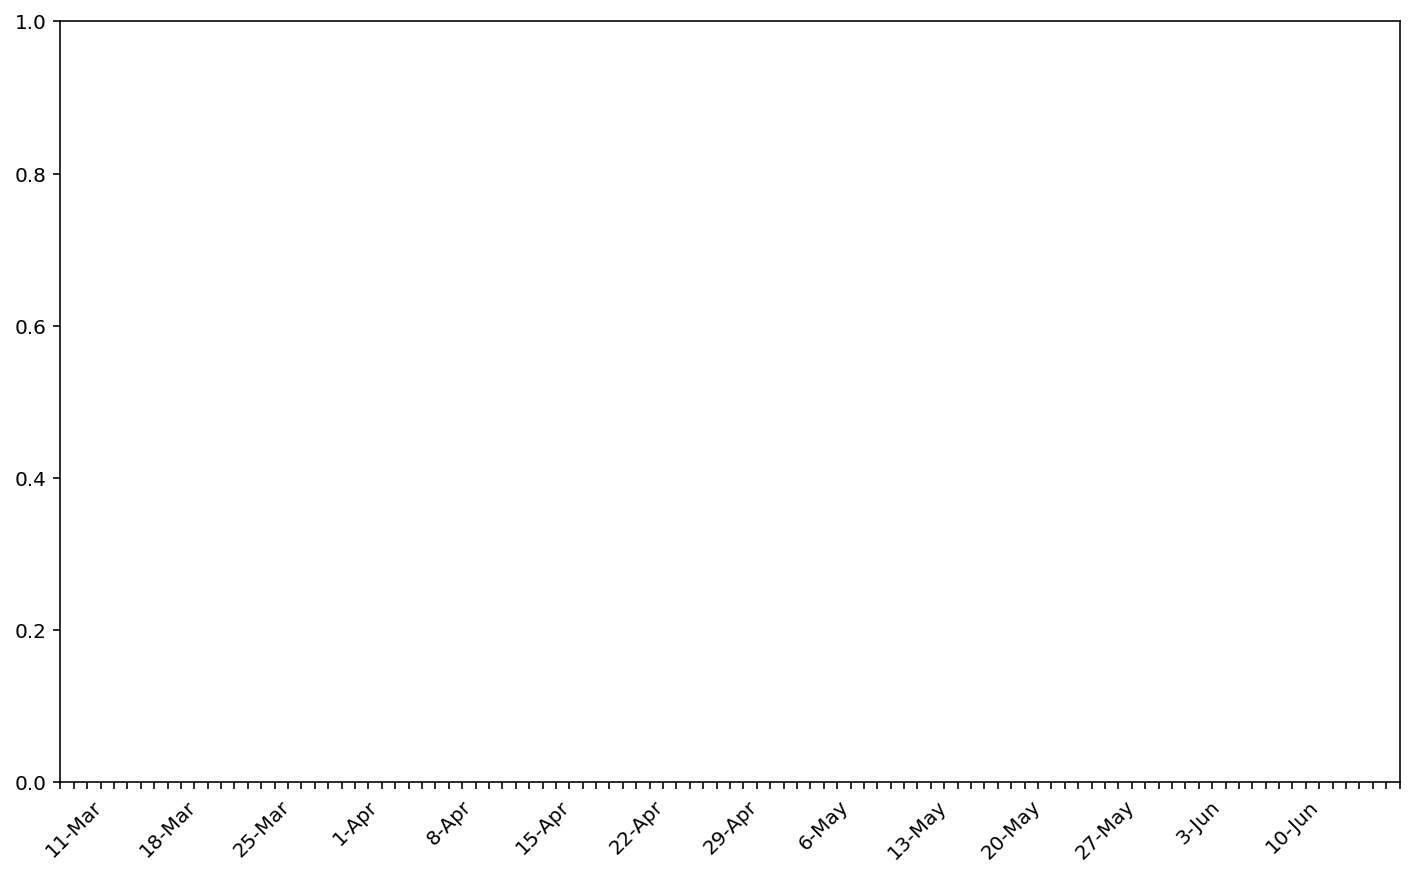

In [81]:
#simulated = sirBasic(S0,I0,R0,x[0],x[1]/S0,lastDay)

n = 150
simulated = sirAdvanced(S0,I0,R0,x[0],x[1],x[2]/S0,x[3]/S0,x[4],x[5],x[6],x[7],n)

# Plot the simulated data as curves
#plt.plot(simulated[0,:], label='Susceptible')
#plt.plot(simulated[1,:], label='Active Cases')
#plt.plot(simulated[2,:], label='Recovered Cases')

# Reset the colors
plt.gca().set_prop_cycle(None)

t = range(lastDay+1)

dateLabels = ['']*lastDay

for counter in range(int((lastDay+1)/7)):
    dateLabels[counter*7+1] = dates[counter*7+1]

plt.xticks(t, dateLabels, rotation=45)

plt.ticklabel_format(useOffset=False, style='plain')

# Plot the real data as dots
# plt.plot(t,data[0,:], '.', label='S data')
plt.plot(t,data[1,:], '.', label='Active Cases')
plt.plot(t,data[2,:], '.', label='Recovered Cases')

plt.legend()
plt.ylabel('Cases')

plt.title('Approximation of Recovered COVID-19 Cases in the US')